___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [50]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [51]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [52]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [54]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

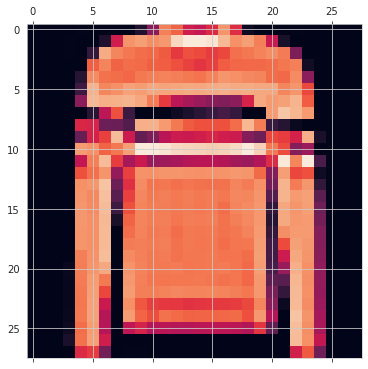

In [55]:
plt.matshow(X_train[5]) # same as plt.imshow(X_train[5])

In [56]:
y_train[5]

2

In [57]:
y_train.shape

(60000,)

In [58]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [59]:
np.unique(y_train, return_counts=True)
# return_countsbool, optional
# If True, also return the number of times each unique item appears in array.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [60]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [61]:
y_train[0]

9

In [62]:
classes[int(y_train[0])]

'Ankle boot'

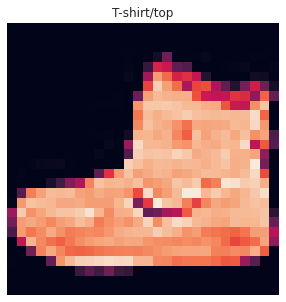

In [63]:
plt.figure(figsize=(5, 5))
for i in range(64):
    plt.axis('off')
    plt.title(classes[int(y_train[1])])
    plt.imshow(X_train[0])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [64]:
X_train[5].min()

0

In [65]:
X_train[5].max()

255

In [66]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [67]:
X_train[5].min()

0.0

In [68]:
X_train[5].max()

1.0

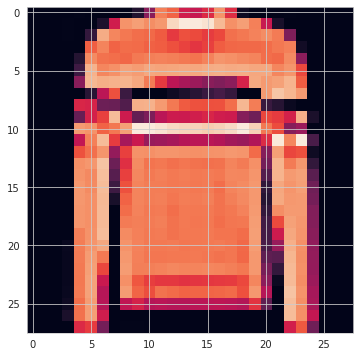

In [69]:
plt.imshow(X_train[5])

In [70]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [73]:
X_train.reshape(60000, 28, 28, 1).shape 
# We are doing a reshape here because it should be given in a way that shows the number of channels 
# in order to be able to put it into training, otherwise the model does not accept it.

(60000, 28, 28, 1)

In [74]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [75]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [76]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [77]:
y_train.shape

(60000,)

In [79]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10)
y_test.shape,y_train.shape

((10000, 10), (60000, 10))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Logits:
# In context of deep learning the logits layer means the layer that feeds in to softmax (or other such normalization).
# The output of the softmax are the probabilities for the classification task and its input is logits layer. 
# The logits layer typically produces values from -infinity to +infinity and the softmax layer transforms it to values from 0 to 1.


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 32)        8096      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 32)      

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [85]:
X_test.shape,y_test.shape

((10000, 28, 28, 1), (10000, 10))

In [86]:
X_train.shape , y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [87]:
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 21s 5ms/step - loss: 0.4199 - accuracy: 0.8478 - val_loss: 0.2977 - val_accuracy: 0.8934
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2795 - accuracy: 0.9005 - val_loss: 0.2809 - val_accuracy: 0.9072
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2523 - accuracy: 0.9101 - val_loss: 0.2833 - val_accuracy: 0.9044
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2392 - accuracy: 0.9152 - val_loss: 0.2736 - val_accuracy: 0.9046
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2313 - accuracy: 0.9190 - val_loss: 0.2677 - val_accuracy: 0.9041
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2243 - accuracy: 0.9202 - val_loss: 0.3659 - val_accuracy: 0.8836
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2213 - accuracy: 0.9233 - val_loss: 0.3021 - val_accur

In [88]:
model.metrics_names

['loss', 'accuracy']

In [89]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.420,0.848,0.298,0.893
1,0.279,0.900,0.281,0.907
2,0.252,0.910,0.283,0.904
3,0.239,0.915,0.274,0.905
4,0.231,0.919,0.268,0.904


**TASK 7: Plot values of metrics you used in your model.**

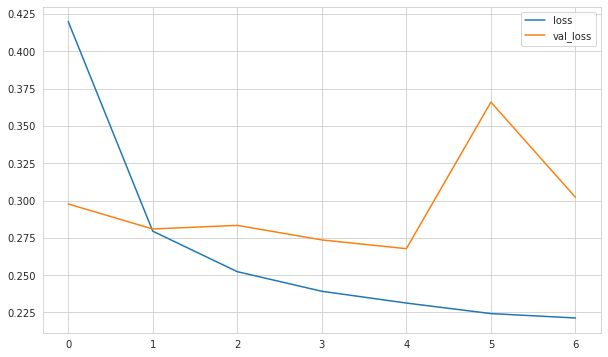

In [90]:
summary[["loss", "val_loss"]].plot();

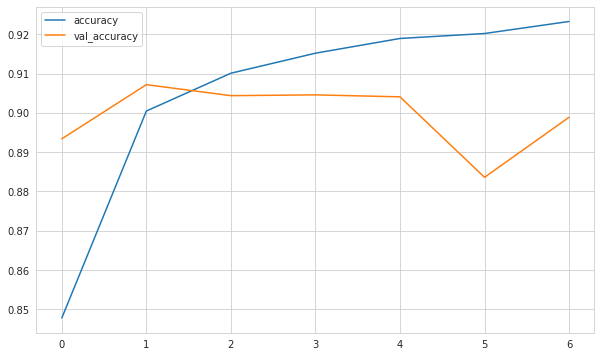

In [91]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9041


[0.26773402094841003, 0.9041000008583069]

In [94]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.26773402094841003
Test accuracy: 0.9041000008583069


In [95]:
pred_prob = model.predict(X_test)
pred_prob

array([[3.6231584e-06, 9.9700005e-12, 1.4360075e-05, ..., 3.3419332e-03,
        2.1229192e-07, 9.9566013e-01],
       [1.5664844e-05, 2.8724969e-13, 9.9975127e-01, ..., 2.8533986e-15,
        3.9787890e-10, 1.5057927e-16],
       [2.0771993e-06, 9.9995589e-01, 3.3209142e-09, ..., 1.5629704e-08,
        2.2535166e-06, 1.3756447e-10],
       ...,
       [1.2965063e-06, 1.5273854e-10, 4.8749666e-06, ..., 1.4256926e-07,
        9.9995172e-01, 3.1339944e-08],
       [9.0255378e-07, 9.9998081e-01, 3.2494725e-09, ..., 6.6316166e-09,
        1.1267988e-06, 1.5405109e-10],
       [5.0711151e-07, 1.4506462e-09, 1.1261029e-07, ..., 2.1435678e-04,
        5.7710212e-04, 1.8387157e-06]], dtype=float32)

In [96]:
pred_prob.shape

(10000, 10)

In [98]:
pred_prob[0]

array([3.6231584e-06, 9.9700005e-12, 1.4360075e-05, 5.9531331e-08,
       8.1019562e-07, 9.7211159e-04, 6.6926937e-06, 3.3419332e-03,
       2.1229192e-07, 9.9566013e-01], dtype=float32)

In [99]:
np.argmax(pred_prob[0])

9

In [100]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [101]:
y_pred.shape

(10000,)

## Prediction

In [107]:
my_clothes = X_test[1]

In [108]:
my_clothes.shape

(28, 28, 1)

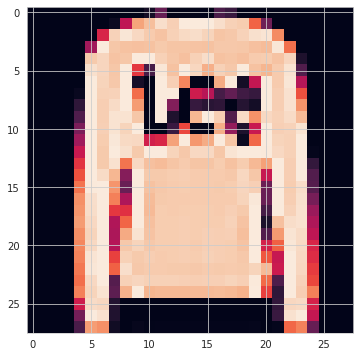

In [109]:
plt.imshow(my_clothes.reshape(28,28));

In [110]:
pred_prob = model.predict(my_clothes.reshape(1,28,28,1))
pred_prob

array([[1.5664918e-05, 2.8725297e-13, 9.9975127e-01, 5.8104010e-09,
        2.1335378e-05, 9.7358331e-15, 2.1175494e-04, 2.8534310e-15,
        3.9787965e-10, 1.5058042e-16]], dtype=float32)

In [111]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

2

In [116]:
model.save("ass-2.h5")

In [117]:
model=tf.keras.models.load_model('ass-2.h5')

In [122]:
pred=model.predict(np.expand_dims(X_test[1],axis=0))

In [123]:
np.argmax(pred)

2

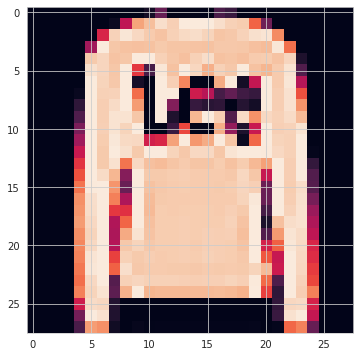

In [124]:
plt.imshow(X_test[1].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___